In [6]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt, seaborn as sns

### Quantiles and Percentiles

In [30]:
data = pd.Series(np.random.default_rng(43).random(10)*10)
data

0    6.522993
1    0.437753
2    0.200296
3    8.392126
4    5.871430
5    2.247052
6    7.517923
7    2.636922
8    4.199779
9    4.510314
dtype: float64

In [42]:
data.sort_values(ignore_index=True,inplace=True)
data

0    0.200296
1    0.437753
2    2.247052
3    2.636922
4    4.199779
5    4.510314
6    5.871430
7    6.522993
8    7.517923
9    8.392126
dtype: float64

In [43]:
data[0]

np.float64(0.20029586874216854)

In [31]:
data.describe()

count    10.000000
mean      4.253659
std       2.852861
min       0.200296
25%       2.344520
50%       4.355046
75%       6.360102
max       8.392126
dtype: float64

In [56]:
data.quantile(0.3)

np.float64(2.519961072959496)

In [61]:
def quantile(series, percentile):
    value = (percentile / 100) * (len(series) - 1)
    whole = np.fix(value)
    dec = value - np.fix(value)
    diff = series[whole + 1] - series[whole]
    return series[whole] + diff * dec

In [126]:
quantile(data, 25)

np.float64(2.34451972022312)

In [63]:
data.median()

np.float64(4.355046483586884)

In [124]:
def percentile_value(series, value):
    n = 0
    for el in series:
        if value > el:
            n += 1
        else:
            break
    return n / len(series) * 100

In [125]:
percentile_value(data, 2.63)

30.0

### 5-Number summary or Quartiles

In [114]:
df = pd.Series(np.random.normal(5,2,10))

In [117]:
df.sort_values(ignore_index=True,inplace=True)

In [118]:
df.describe()

count    10.000000
mean      4.697980
std       2.536219
min       1.169990
25%       2.514966
50%       5.202365
75%       6.092119
max       8.400124
dtype: float64

In [140]:
def fivenum(data):
    q1 = quantile(data, 25)
    q2 = quantile(data, 50)
    q3 = quantile(data, 75)
    iqr = q3 - q1
    whisker = iqr * 1.5
    return np.min(data), q1, q2, q3, np.max(data)

In [141]:
fivenum(df)

(np.float64(1.1699903533837195),
 np.float64(2.5149658877843466),
 np.float64(5.202364744450234),
 np.float64(6.092119347638826),
 np.float64(8.400123656736206))

<Axes: >

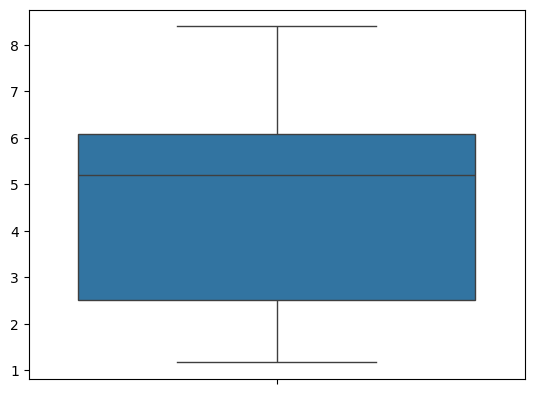

In [142]:
sns.boxplot(df)